In [3]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
def transform_cleb_df_into_wal_df(cleb_df):
    
    index_names = {}
    for i, (_, row) in enumerate(cleb_df.iterrows()):
        
        year = str(int(row[2]))
        month = str(int(row[1]))
        day = str(int(row[0]))
        hour = str(int(row[3]))
        index_name = year+'-'+month+'-'+day+'-'+hour
        
        index_names[i] = index_name
        
    
    cleb_df.rename(index=index_names)
    cleb_df = cleb_df.drop('day', 1)
    cleb_df = cleb_df.drop('month', 1)
    cleb_df = cleb_df.drop('year', 1)
    cleb_df = cleb_df.drop('hour', 1)
    return cleb_df.replace(-1, np.nan)





flow_path = "/home/colombelli/Documents/hydro-ml/data/Vazao.txt"
rain_path = "/home/colombelli/Documents/hydro-ml/data/Chuva.txt"
et_path = "/home/colombelli/Documents/hydro-ml/data/ET.txt"

flow_df = pd.read_csv(flow_path, sep="\t", header=None)
flow_df.columns = ["day", "month", "year", "hour", "flow"]

rain_df = pd.read_csv(rain_path, sep="\t", header=None)
rain_df.columns = ["day", "month", "year", "hour", "rain"]

et_df = pd.read_csv(et_path, sep="\t", header=None)
et_df.columns = ["day", "month", "year", "hour", "et"]


flow_df = transform_cleb_df_into_wal_df(flow_df)
rain_df = transform_cleb_df_into_wal_df(rain_df)
et_df = transform_cleb_df_into_wal_df(et_df)

In [22]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix:out_end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [25]:
dataset = pd.concat([flow_df, rain_df, et_df], axis=1)
dataset.columns = ['flow', 'rain', 'et']

n_steps_in = 48
n_steps_out = 24

to_split = np.array(dataset.iloc[6078:17486, ])   # get 14086 to 17486 for testing
X, y = split_sequences(to_split, n_steps_in, n_steps_out)

In [45]:
n_features = X.shape[2]

model = Sequential()
model.add(LSTM(512, 
               activation='sigmoid',
               input_shape=(n_steps_in, n_features)))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [46]:
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
355/355 [==============================] - 88s 248ms/step - loss: 259692.8594
Epoch 2/200
355/355 [==============================] - 90s 254ms/step - loss: 200214.7812
Epoch 3/200
355/355 [==============================] - 87s 246ms/step - loss: 164219.3438
Epoch 4/200
355/355 [==============================] - 85s 239ms/step - loss: 139393.3594
Epoch 5/200
355/355 [==============================] - 85s 238ms/step - loss: 120806.4141
Epoch 6/200
355/355 [==============================] - 85s 240ms/step - loss: 105007.2031
Epoch 7/200
355/355 [==============================] - 86s 243ms/step - loss: 91173.0391
Epoch 8/200
355/355 [==============================] - 86s 242ms/step - loss: 78924.5078
Epoch 9/200
355/355 [==============================] - 86s 242ms/step - loss: 68900.8438
Epoch 10/200
355/355 [==============================] - 86s 243ms/step - loss: 60235.8945
Epoch 11/200
355/355 [==============================] - 86s 243ms/step - loss: 53404.2266
Epoch 12/200


355/355 [==============================] - 86s 242ms/step - loss: 19207.2773
Epoch 93/200
355/355 [==============================] - 85s 240ms/step - loss: 12731.0449
Epoch 94/200
355/355 [==============================] - 86s 242ms/step - loss: 11919.0732
Epoch 95/200
355/355 [==============================] - 86s 242ms/step - loss: 10470.4941
Epoch 96/200
355/355 [==============================] - 85s 240ms/step - loss: 9414.4766
Epoch 97/200
355/355 [==============================] - 86s 242ms/step - loss: 12270.3486
Epoch 98/200
355/355 [==============================] - 86s 241ms/step - loss: 12271.9873
Epoch 99/200
355/355 [==============================] - 86s 242ms/step - loss: 10344.9912
Epoch 100/200
355/355 [==============================] - 86s 241ms/step - loss: 10005.1406
Epoch 101/200
355/355 [==============================] - 86s 242ms/step - loss: 10221.9307
Epoch 102/200
355/355 [==============================] - 86s 241ms/step - loss: 11396.6846
Epoch 103/200
355/355

355/355 [==============================] - 88s 247ms/step - loss: 6393.6704
Epoch 183/200
355/355 [==============================] - 88s 249ms/step - loss: 5988.4937
Epoch 184/200
355/355 [==============================] - 88s 248ms/step - loss: 6288.0762
Epoch 185/200
355/355 [==============================] - 88s 249ms/step - loss: 7190.7808
Epoch 186/200
355/355 [==============================] - 88s 248ms/step - loss: 6028.2178
Epoch 187/200
355/355 [==============================] - 88s 249ms/step - loss: 15019.5215
Epoch 188/200
355/355 [==============================] - 88s 248ms/step - loss: 8617.4697
Epoch 189/200
355/355 [==============================] - 89s 250ms/step - loss: 7174.9756
Epoch 190/200
355/355 [==============================] - 88s 248ms/step - loss: 5784.7285
Epoch 191/200
355/355 [==============================] - 88s 248ms/step - loss: 5641.5522
Epoch 192/200
355/355 [==============================] - 88s 248ms/step - loss: 8567.9033
Epoch 193/200
355/355 [

In [48]:
from tensorflow.keras.models import model_from_json

In [49]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [50]:
# serialize weights to HDF5
model.save_weights("model.h5")

In [66]:
to_split = np.array(dataset.iloc[14478:17486, ])
X, y = split_sequences(to_split, n_steps_in, n_steps_out)

In [80]:
def get_nash(observed, modeled):
    
    mean_obs = np.mean(observed)
    
    variance = 0 
    squared_err = 0
    for t, obs_flow in enumerate(observed):
        squared_err += (modeled[t] - obs_flow) ** 2
        variance += (obs_flow - mean_obs) ** 2
        
    nash = 1 - (squared_err  / variance)
    return nash

In [73]:
observeds = []
predictions = []
count=1

test_len = len(X)
for i in tqdm(range(test_len)):
    
    x = X[i].reshape((1, n_steps_in, n_features))
    predicted = model.predict(x, verbose=0).flatten()
    observed = y[i]
    
    observeds.append(observed)
    predictions.append(predicted)

100%|██████████| 2937/2937 [01:18<00:00, 37.59it/s]


In [79]:
win_24_pred = []
for pred in predictions:
    win_24_pred.append(pred[23])

win_24_obs = []
for obs in observeds:
    win_24_obs.append(obs[23])

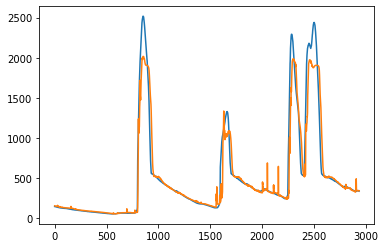

In [82]:
plt.plot(win_24_obs)
plt.plot(win_24_pred)

In [81]:
get_nash(win_24_obs,win_24_pred)

0.8986701249471573

In [84]:
import pickle
with open('obs.pkl', 'wb') as f:
    pickle.dump(observeds, f)
    
with open('pred.pkl', 'wb') as f:
    pickle.dump(predictions, f)